# Zomato EDA Case Study

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("6. zomato.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [6]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0.1             0.000000
Unnamed: 0               0.000000
restaurant name          0.000000
restaurant type          0.000000
rate (out of 5)          0.957072
num of ratings           0.000000
avg cost (two people)    0.802252
online_order             0.000000
table booking            0.000000
cuisines type            0.000000
area                     0.000000
local address            0.000000
dtype: float64

In [7]:
df.drop_duplicates(inplace=True)
df["rate (out of 5)"]= df["rate (out of 5)"].fillna(df["rate (out of 5)"].mean())
df["avg cost (two people)"]= df["avg cost (two people)"].fillna(df["avg cost (two people)"].mean())
df.drop(["Unnamed: 0.1","Unnamed: 0","local address"],axis=1, inplace=True)

In [8]:
df.isnull().sum()/df.shape[0]*100

restaurant name          0.0
restaurant type          0.0
rate (out of 5)          0.0
num of ratings           0.0
avg cost (two people)    0.0
online_order             0.0
table booking            0.0
cuisines type            0.0
area                     0.0
dtype: float64

# EDA Questions

In [10]:
print("\n1. Average rating of restaurants:")
df["rate (out of 5)"].mean().round(2)


1. Average rating of restaurants:


3.51

In [11]:
print("\n2. No. of unique cities in the dataset:")
df["area"].nunique()


2. No. of unique cities in the dataset:


30

In [12]:
print("\n3. City with the highest number of restaurants:")
df["area"].value_counts().head(1)


3. City with the highest number of restaurants:


area
Byresandra,Tavarekere,Madiwala    798
Name: count, dtype: int64


4. Distribution of restaurant ratings:


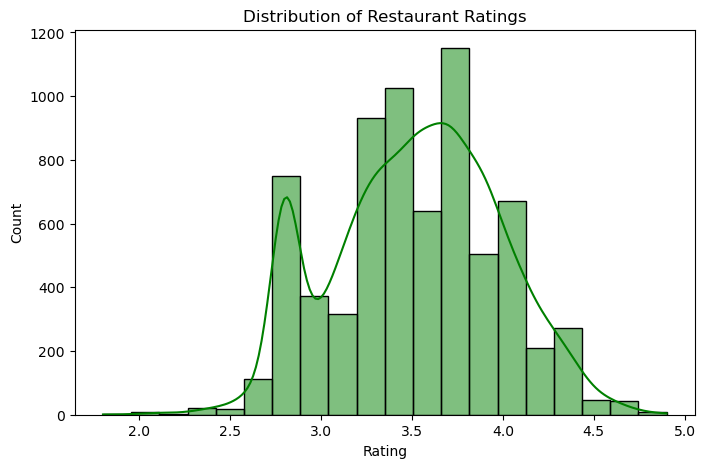

In [13]:
print("\n4. Distribution of restaurant ratings:")
plt.figure(figsize=(8,5))
sns.histplot(df['rate (out of 5)'], bins=20, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [14]:
print("\n5. Most common cuisines among the restaurants:")
cuisines_type= df["cuisines type"].value_counts().head(10)
print(cuisines_type)


5. Most common cuisines among the restaurants:
cuisines type
North Indian, Chinese                  421
North Indian                           420
South Indian                           348
Fast Food                              140
South Indian, North Indian, Chinese    128
Biryani                                122
Bakery, Desserts                        97
Desserts                                87
Cafe                                    85
Bakery                                  77
Name: count, dtype: int64


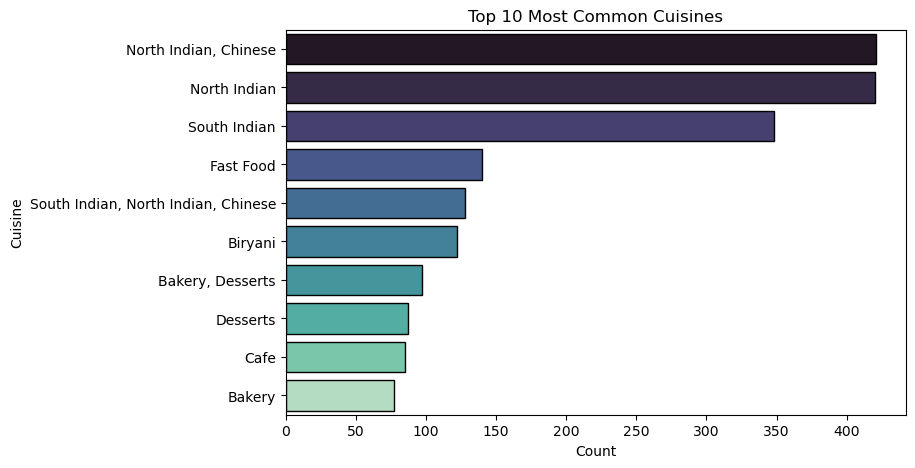

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x= cuisines_type.values, y=cuisines_type.index, palette='mako', hue=cuisines_type.index, edgecolor= "black", legend= False)
plt.title('Top 10 Most Common Cuisines')
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

In [16]:
print("\n6. Average cost for two people in different cities:")
avgcost_area=df.groupby("area")["avg cost (two people)"].mean().sort_values(ascending= True).head(10)
print(avgcost_area)


6. Average cost for two people in different cities:
area
Koramangala 5th Block    368.571429
Banashankari             388.548747
Basavanagudi             397.618161
Koramangala 6th Block    403.110696
Rajajinagar              418.249050
Frazer Town              419.290261
JP Nagar                 441.304348
New BEL Road             444.527220
Bannerghatta Road        446.974638
HSR                      460.541796
Name: avg cost (two people), dtype: float64


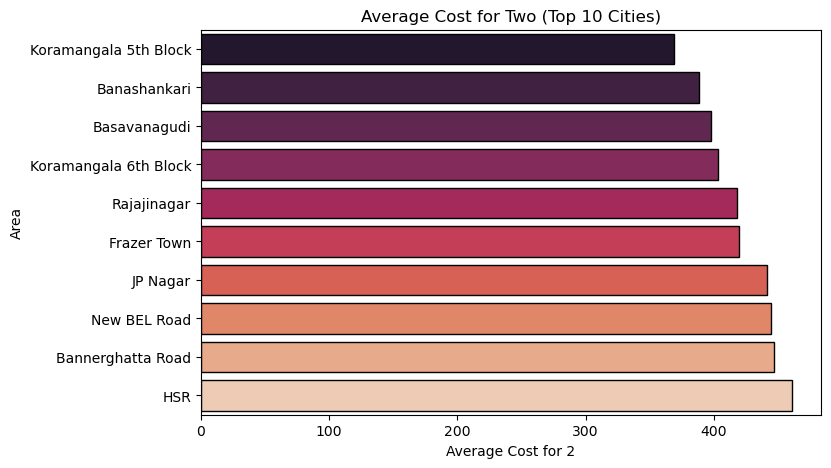

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x= avgcost_area.values, y=avgcost_area.index, palette='rocket', hue=avgcost_area.index, edgecolor= "black", legend= False)
plt.title('Average Cost for Two (Top 10 Cities)')
plt.xlabel("Average Cost for 2")
plt.ylabel("Area")
plt.show()

In [18]:
print("\n7. Distribution of restaurant types:")
res_type=df["restaurant type"].value_counts().head(10)
print(res_type)


7. Distribution of restaurant types:
restaurant type
Quick Bites           2840
Casual Dining         1634
Cafe                   403
Delivery               358
Takeaway, Delivery     289
Dessert Parlor         217
Bakery                 154
Casual Dining, Bar     123
Beverage Shop          118
Bar                     82
Name: count, dtype: int64


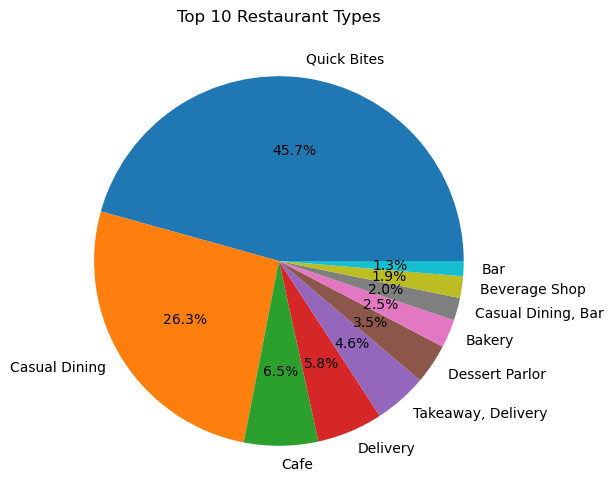

In [19]:
plt.figure(figsize=(6,6))
plt.pie(res_type, 
        labels=res_type.index, 
        autopct='%1.1f%%')
plt.title('Top 10 Restaurant Types')
plt.show()

In [20]:
print("\n8. Correlation between the rating and the average cost for two people:")
df["rate (out of 5)"].corr(df["avg cost (two people)"])


8. Correlation between the rating and the average cost for two people:


0.37408629907593677

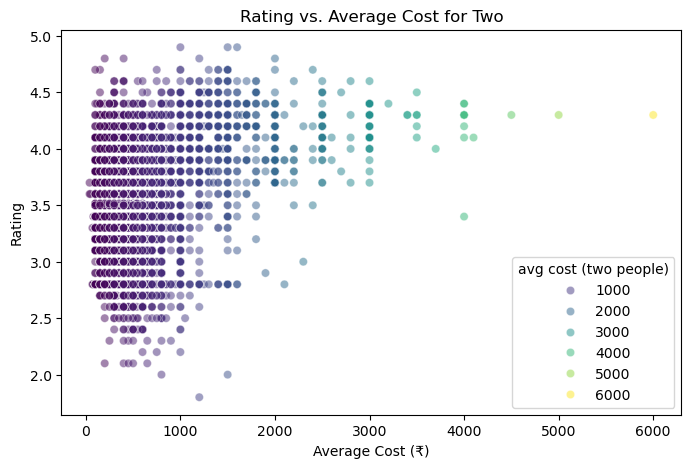

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='avg cost (two people)', y='rate (out of 5)', data=df, alpha=0.5, hue='avg cost (two people)', palette='viridis')
plt.title('Rating vs. Average Cost for Two')
plt.xlabel('Average Cost (₹)')
plt.ylabel('Rating')
plt.show()

In [22]:
print("\n9. Correlation between the number of votes and the rating of restaurants:")
df["num of ratings"].corr(df["rate (out of 5)"])


9. Correlation between the number of votes and the rating of restaurants:


0.3801418074323896

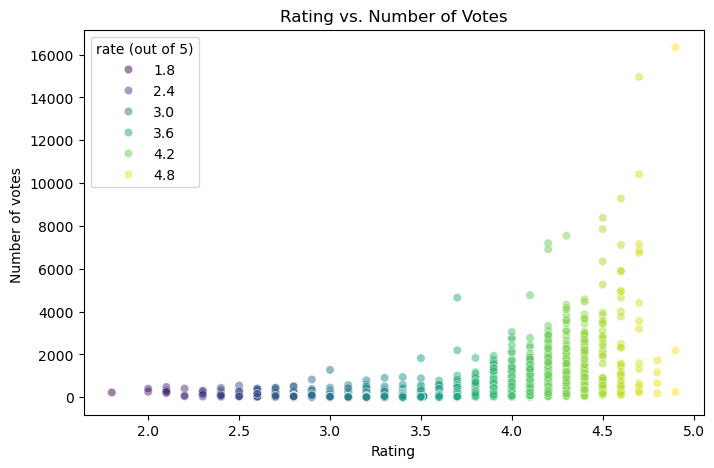

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rate (out of 5)', y='num of ratings', data=df, alpha=0.5, hue='rate (out of 5)', palette='viridis')
plt.title('Rating vs. Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Number of votes ')
plt.show()

In [24]:
print("\n10. Area with the highest number of highlyrated restaurants:")
high_rated= df[df["rate (out of 5)"] > 4.5]
area_counts = high_rated["area"].value_counts().head(5)
print(area_counts)


10. Area with the highest number of highlyrated restaurants:
area
Byresandra,Tavarekere,Madiwala    7
HSR                               5
Malleshwaram                      5
Brookefield                       5
Indiranagar                       5
Name: count, dtype: int64


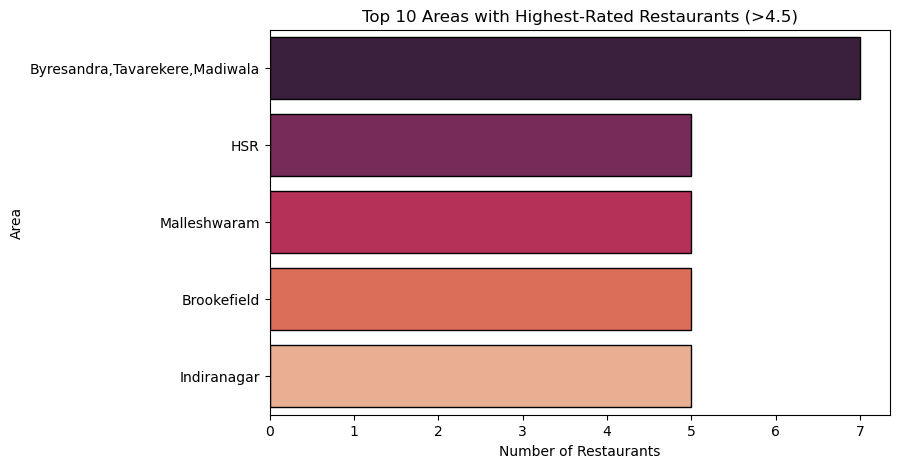

In [25]:
plt.figure(figsize= (8,5))
sns.barplot(x=area_counts.values, y= area_counts.index, palette='rocket', hue=area_counts.index, edgecolor= "black", legend= False)
plt.title('Top 10 Areas with Highest-Rated Restaurants (>4.5)')
plt.xlabel("Number of Restaurants")
plt.ylabel("Area")
plt.show() 